# Unit 12 - Tales from the Crypto

---


pip install python-dotenv## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hillaryhwaga/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
load_dotenv()

True

In [4]:
pip install --upgrade "ibm-watson>=3.0.3"

Note: you may need to restart the kernel to use updated packages.


In [5]:
from ibm_watson import ToneAnalyzerV3

In [6]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("News_API_Key")
print(api_key)

18938feca970455382a0fc6748fb3388


In [7]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient

In [8]:
newsapi = NewsApiClient(api_key=api_key)

In [9]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headline = newsapi.get_everything(q="bitcoin", language = "en", sort_by = "relevancy")

In [10]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_headline = newsapi.get_everything(q= "ethereum", language = "en", sort_by = "relevancy")

In [11]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
sentiments = []

for articles in btc_headline["articles"]:
    try:  
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc = pd.DataFrame(sentiments)
btc.head()

,text,Compound,Positive,Negative,Neutral
0,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
1,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
2,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920
3,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000,0.271,0.729
4,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873


In [12]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
sentiments = []

for article in eth_headline["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        
        sentiments.append({
            "text": text, 
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass 
    
eth = pd.DataFrame(sentiments)
eth

,text,Compound,Positive,Negative,Neutral
0,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0
1,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0
2,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0
3,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0
4,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0
5,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0
6,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0
7,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0
8,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0
9,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0


In [13]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.034640,0.047050,0.040100,0.912850
std,0.435160,0.058669,0.069485,0.074081
min,-0.886000,0.000000,0.000000,0.729000
25%,-0.307000,0.000000,0.000000,0.861750
50%,0.000000,0.000000,0.000000,0.914500
75%,0.416125,0.090750,0.076250,1.000000
max,0.690800,0.178000,0.271000,1.000000


In [14]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.0,20.0,20.0,20.0
mean,0.0,0.0,0.0,1.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,1.0
25%,0.0,0.0,0.0,1.0
50%,0.0,0.0,0.0,1.0
75%,0.0,0.0,0.0,1.0
max,0.0,0.0,0.0,1.0


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [15]:
# The Highest mean positive score was eth
#The highest compound score was btc
# The highest positive score was btc

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:

# Instantiate the lemmatizer
# YOUR CODE HERE!
wnl = WordNetLemmatizer()
# Create a list of stopwords
# YOUR CODE HERE!
stop = stopwords.words('english')
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('...')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [18]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    words = word_tokenize(text)
    # Remove the punctuation from text
    words = list(filter(lambda t:t not in punctuation, words))
   
    
    # Lemmatize words into root words
    tokens = [wnl.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in stop, words))
    
    return tokens

In [19]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
btc["tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[When, my, wife, started, a, little, garden, i..."
1,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[Like, Dogecoin, devotee, the, mayor, of, Reno..."
2,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,0.4019,0.080,0.000,0.920,"[Photo, by, Joe, Raedle/Getty, Images, Twitter..."
3,"By Joe TidyCyber reporter \r\n""Follow the mone...",-0.8860,0.000,0.271,0.729,"[By, Joe, TidyCyber, reporter, '', Follow, the..."
4,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[To, get, a, roundup, of, TechCrunchs, biggest..."


In [20]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
eth["tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0,"[Posted, Tesla, is, likely, to, start, taking,..."
1,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0,"[Posted, Tesla, is, likely, to, start, taking,..."
2,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0,"[Posted, Tesla, is, likely, to, start, taking,..."
3,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0,"[Posted, Tesla, is, likely, to, start, taking,..."
4,Posted \r\nTesla is likely to start taking bit...,0.0,0.0,0.0,1.0,"[Posted, Tesla, is, likely, to, start, taking,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('in', 'this'), 5),
 (('illustration', 'taken'), 5),
 (('Reuters', 'Bitcoin'), 4),
 (('seen', 'in'), 4),
 (('this', 'illustration'), 4),
 (('and', 'the'), 3),
 (('char', 'By'), 3),
 (('of', 'virtual'), 3),
 (('virtual', 'currency'), 3),
 (('currency', 'bitcoin'), 3),
 (('is', 'seen'), 3),
 (('in', 'front'), 3),
 (('front', 'of'), 3),
 (('REUTERS/Dado', 'Ruvic/Illustration'), 3),
 (('bug', 'and'), 2),
 (('on', 'Monday'), 2),
 (('it', "'s"), 2),
 (('char', 'T-Mobile'), 2),
 (('a', 'statement'), 2),
 (('char', 'As'), 2)]

In [23]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Tesla', 'is'), 20),
 (('is', 'likely'), 20),
 (('likely', 'to'), 20),
 (('to', 'start'), 20),
 (('start', 'taking'), 20),
 (('taking', 'bitcoin'), 20),
 (('bitcoin', 'again'), 20),
 (('again', 'a'), 20),
 (('a', 'long'), 20),
 (('long', 'a'), 20),
 (('a', 'it'), 20),
 (('it', 'see'), 20),
 (('see', 'sign'), 20),
 (('sign', 'the'), 20),
 (('the', 'e-coin'), 20),
 (('e-coin', 'is'), 20),
 (('is', 'becoming'), 20),
 (('becoming', 'more'), 20),
 (('more', 'environmentally'), 20),
 (('environmentally', 'sustainable'), 20)]

In [24]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [25]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('the', 23),
 ('of', 20),
 ('char', 19),
 ('a', 17),
 ('in', 15),
 ('and', 15),
 ('is', 10),
 ('this', 8),
 ('on', 8),
 ('it', 8)]

In [26]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('is', 40),
 ('a', 40),
 ('Tesla', 20),
 ('likely', 20),
 ('to', 20),
 ('start', 20),
 ('taking', 20),
 ('bitcoin', 20),
 ('again', 20),
 ('long', 20)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [30]:
def wordcloud(text,title =""):
    cloud_df = WordCloud(width=500, colormap ='RdYlBu').generate(text)
    plt.imshow(cloud_df)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight": "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

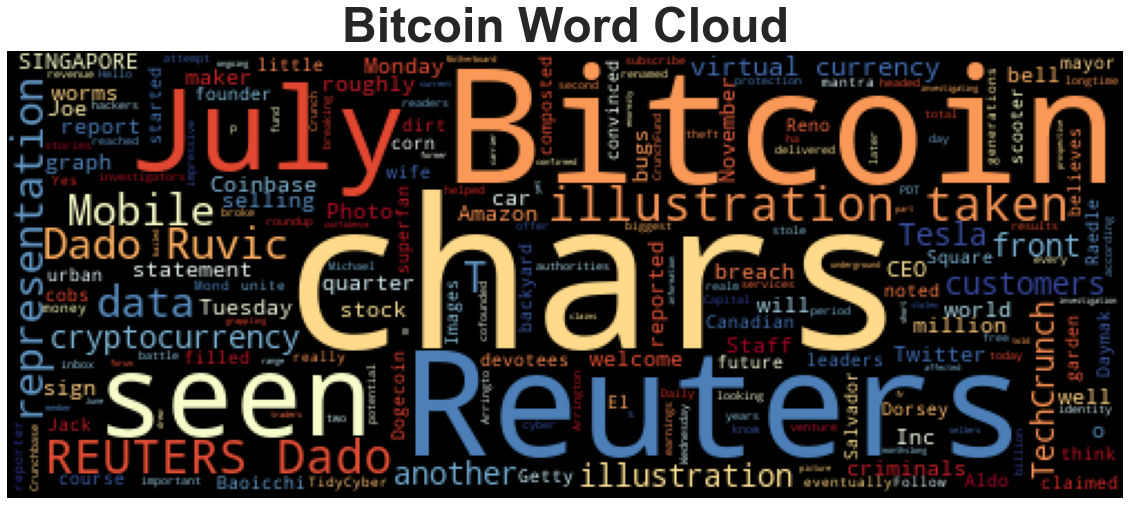

In [31]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
wordcloud(btc.text.str.cat(), title = "Bitcoin Word Cloud")

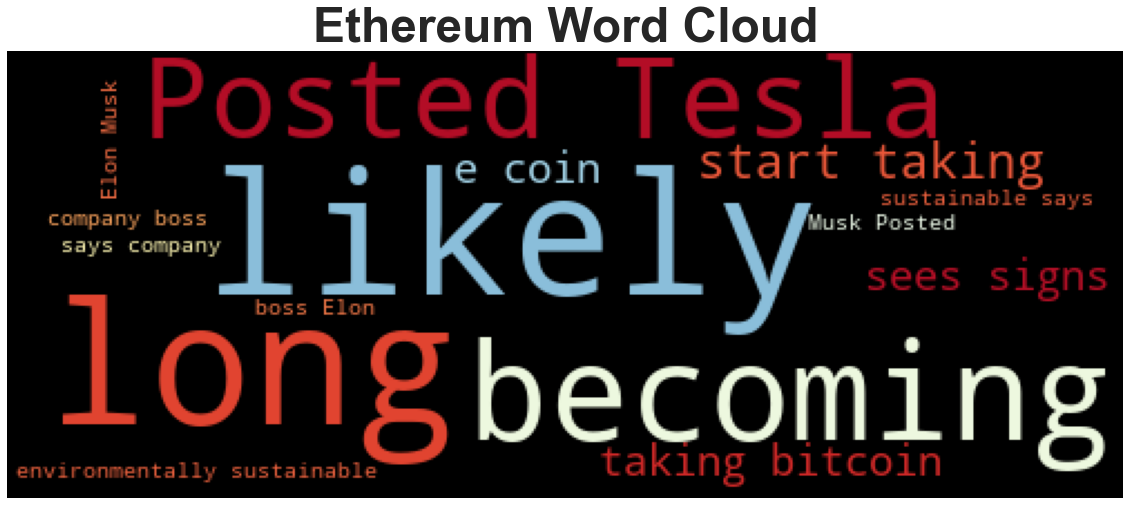

In [32]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud(eth.text.str.cat(), title = "Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
pip install -U pip setuptools wheel

     |████████████████████████████████| 1.6 MB 4.7 MB/s eta 0:00:01
  Using cached setuptools-57.4.0-py3-none-any.whl (819 kB)
  Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.36.2
    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 52.0.0.post20210125
    Uninstalling setuptools-52.0.0.post20210125:
      Successfully uninstalled setuptools-52.0.0.post20210125
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cl

In [35]:
pip install -U spacy

     |████████████████████████████████| 6.0 MB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 8.9 MB/s  eta 0:00:01
     |████████████████████████████████| 2.6 MB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 450 kB 21.0 MB/s eta 0:00:01
     |████████████████████████████████| 598 kB 32.2 MB/s eta 0:00:01
     |████████████████████████████████| 105 kB 63.8 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 13.0 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 34.9 MB/s eta 0:00:01
     |████████████████████████████████| 82 kB 7.6 MB/s  eta 0:00:01
  Attempting uninstall: click
    Found existing installation: click 8.0.1
    Uninstalling click-8.0.1:
      Successfully uninstalled click-8.0.1
Note: you may need to restart the kernel to use updated packages.


In [39]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 6.7 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [41]:
import spacy
from spacy import displacy

In [42]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [43]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_btc_text = btc.text.str.cat()
all_btc_text

'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars]By Joe TidyCyber reporter \r\n"Follow the money" - for generations it\'s been the mantra of investigators looking for criminals.\r\nIn the cyber-realm, this battle between criminals and the authorities ha… [+3786 chars]To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\

In [44]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
docu = nlp(all_btc_text)
# Add a title to the document
# YOUR CODE HERE!
docu.user_data["title"] = "Bitcoin"

In [46]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(docu, style ='ent', jupyter =True)

In [48]:
# List all Entities
# YOUR CODE HERE!
for ent in docu.ents:
    print(ent.text, ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Joe Raedle/ PERSON
Twitter PRODUCT
Square PRODUCT
Jack Dorsey PERSON
Monday DATE
Joe PERSON
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
chars]T-Mobile ORG
two years DATE
roughly 49 million CARDINAL
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
Motherboard PERSON
T-Mobile ORG
Roughly 47.8 million CARDINAL
June 7, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationAug PERSON
Reuters ORG
7.07% PERCENT
47,587.38 MONEY
2200 CARDINAL
Martin/CNET
A ORG
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE O

---

### Ethereum NER

In [49]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_eth_text = eth.text.str.cat()
all_eth_text

'Posted \r\nTesla is likely to start taking bitcoin again, as long as it sees signs the e-coin is becoming more environmentally sustainable, says company boss Elon Musk.Posted \r\nTesla is likely to start taking bitcoin again, as long as it sees signs the e-coin is becoming more environmentally sustainable, says company boss Elon Musk.Posted \r\nTesla is likely to start taking bitcoin again, as long as it sees signs the e-coin is becoming more environmentally sustainable, says company boss Elon Musk.Posted \r\nTesla is likely to start taking bitcoin again, as long as it sees signs the e-coin is becoming more environmentally sustainable, says company boss Elon Musk.Posted \r\nTesla is likely to start taking bitcoin again, as long as it sees signs the e-coin is becoming more environmentally sustainable, says company boss Elon Musk.Posted \r\nTesla is likely to start taking bitcoin again, as long as it sees signs the e-coin is becoming more environmentally sustainable, says company boss E

In [50]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
docu = nlp(all_btc_text)
# Add a title to the document
# YOUR CODE HERE!
docu.user_data["title"] = "Ethereum"

In [53]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(docu, style ='ent', jupyter =True)

In [54]:
# List all Entities
# YOUR CODE HERE!
for ent in docu.ents:
    print(ent.text, ent.label_)

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Joe Raedle/ PERSON
Twitter PRODUCT
Square PRODUCT
Jack Dorsey PERSON
Monday DATE
Joe PERSON
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
chars]T-Mobile ORG
two years DATE
roughly 49 million CARDINAL
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
Motherboard PERSON
T-Mobile ORG
Roughly 47.8 million CARDINAL
June 7, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationAug PERSON
Reuters ORG
7.07% PERCENT
47,587.38 MONEY
2200 CARDINAL
Martin/CNET
A ORG
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration
SINGAPORE O

---